Epoch 1/400
77/77 [==============================] - 0s 2ms/step - loss: 8.7081 - accuracy: 0.5794 - val_loss: 0.8242 - val_accuracy: 0.6102
Epoch 2/400
77/77 [==============================] - 0s 1ms/step - loss: 0.7519 - accuracy: 0.6198 - val_loss: 0.6915 - val_accuracy: 0.6378
Epoch 3/400
77/77 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6406 - val_loss: 0.6725 - val_accuracy: 0.6063
Epoch 4/400
77/77 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6797 - val_loss: 0.6348 - val_accuracy: 0.6457
Epoch 5/400
77/77 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.6602 - val_loss: 0.7033 - val_accuracy: 0.6260
Epoch 6/400
77/77 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.6641 - val_loss: 0.6055 - val_accuracy: 0.6772
Epoch 7/400
77/77 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.6615 - val_loss: 0.6253 - val_accuracy: 0.6654
Epoch 8/400
7

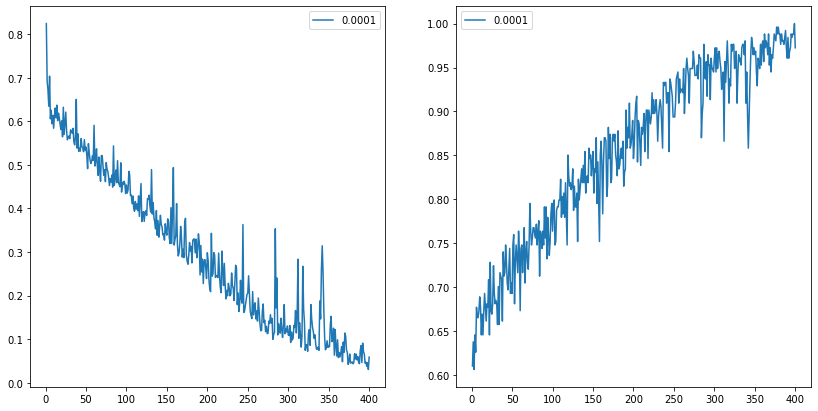

    decay       acc     loss
0  0.0001  0.972441  0.05867


In [6]:
# first neural network with keras tutorial
from    keras.models import Sequential
from    keras.layers import Dense
import  pandas as pd
from    sklearn.model_selection import train_test_split
import  matplotlib.pyplot  as plt
PATH  = "../datasets/"
import tensorflow as tf

# load the dataset
df = pd.read_csv(PATH + 'diabetes.csv', sep=',')

# split into input (X) and output (y) variables
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
        'DiabetesPedigreeFunction',    'Age']]
y = df[['Outcome']]

# Split into train and test data sets.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)

resultList = []
def buildModel(decayRate):
    # define the keras model
    model = Sequential()
    model.add(Dense(230, input_dim=8, activation='relu',
                    kernel_initializer='he_normal'))

    NUM_LAYERS = 7
    for i in range(0, NUM_LAYERS-1):
        model.add(Dense(230, activation='relu',
                        kernel_initializer='he_normal'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.SGD(
        learning_rate=0.0005, momentum=0.9, name="SGD", decay=decayRate
    )

    # Compile the keras model.
    model.compile(loss='binary_crossentropy', optimizer=optimizer,
                  metrics=['accuracy'])

    # Fit the keras model on the dataset.
    history = model.fit(X, y, epochs=400, batch_size=10,
                        validation_data=(X_test, y_test))

    # Evaluate the model.
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    resultList.append({'loss':loss, 'acc':acc, 'decay':decayRate})
    print('Test Accuracy: %.3f' % acc)
    return history

def showLoss(history, rates):
    # Get training and test loss histories
    training_loss       = history.history['loss']
    validation_loss     = history.history['val_loss']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize loss history for training data.
    actualLabel = str(rates)
    plt.subplot(1, 2, 1)

    # View loss on unseen data.
    plt.plot(epoch_count, validation_loss, label=actualLabel)
    plt.legend()

def showAccuracy(history, rates):
    # Get training and test loss histories
    training_loss       = history.history['accuracy']
    validation_loss     = history.history['val_accuracy']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)
    plt.subplot(1, 2, 2)

    actualLabel = str(rates)
    # View loss on unseen data.
    plt.plot(epoch_count, validation_loss, label=actualLabel)
    plt.legend()


with tf.device('/cpu:0'):
    decayRates = [0.0001]
    plt.subplots(nrows=1, ncols=2,  figsize=(14,7))

    for i in range(0, len(decayRates)):
        history = buildModel(decayRates[i])
        showLoss(history, decayRates[i])
        showAccuracy(history, decayRates[i])

    plt.show()

    import pandas as pd
    df = pd.DataFrame(columns=['decay', 'acc', 'loss'])
    for result in resultList:
        df = df.append(result, ignore_index=True)
    print(df)

Epoch 1/500
 1/16 [>.............................] - ETA: 2s - loss: 5.2030 - accuracy: 0.6250

/Users/ryanleung/miniforge3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


16/16 [==============================] - 0s 5ms/step - loss: 7.4086 - accuracy: 0.5120 - val_loss: 7.5636 - val_accuracy: 0.5040
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 7.6856 - accuracy: 0.4960 - val_loss: 7.5636 - val_accuracy: 0.5040
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 7.6856 - accuracy: 0.4960 - val_loss: 7.5636 - val_accuracy: 0.5040
Epoch 4/500
16/16 [==============================] - 0s 1ms/step - loss: 7.6856 - accuracy: 0.4960 - val_loss: 7.5636 - val_accuracy: 0.5040
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 7.6856 - accuracy: 0.4960 - val_loss: 7.5636 - val_accuracy: 0.5040
Epoch 6/500
16/16 [==============================] - 0s 1ms/step - loss: 7.6856 - accuracy: 0.4960 - val_loss: 7.5636 - val_accuracy: 0.5040
Epoch 7/500
16/16 [==============================] - 0s 1ms/step - loss: 7.6856 - accuracy: 0.4960 - val_loss: 7.5636 - val_accuracy: 0.5040
Epoch 8/500
16/16 [======

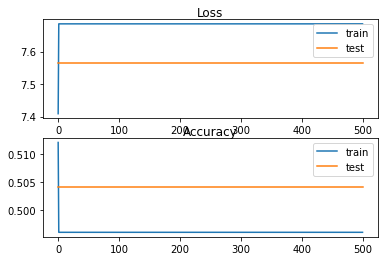

In [9]:
# deeper mlp with tanh for the two circles classification problem
from sklearn.datasets       import make_circles
from sklearn.preprocessing  import MinMaxScaler
from keras.layers           import Dense
from keras.models           import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import RandomUniform
import matplotlib.pyplot    as plt
import tensorflow as tf


with tf.device('/cpu:0'):
    # Generate 2d classification dataset.
    X, y    = make_circles(n_samples=1000, noise=0.1, random_state=1)
    scaler  = MinMaxScaler(feature_range=(-1, 1))
    X       = scaler.fit_transform(X)

    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]

    # Define the model.
    model = Sequential()
    init = 'he_uniform'
    activation = 'relu'
    model.add(Dense(5, input_dim=2, activation=activation, kernel_initializer=init))
    model.add(Dense(5, activation=activation, kernel_initializer=init))
    model.add(Dense(5, activation=activation, kernel_initializer=init))
    model.add(Dense(5, activation=activation, kernel_initializer=init))
    model.add(Dense(5, activation=activation, kernel_initializer=init))
    model.add(Dense(1, activation=activation, kernel_initializer=init))

    # Compile model.
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=1)

    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

    # Plot loss learning curves.
    plt.subplot(211)
    plt.title('Loss', pad=-40)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()

    # Plot accuracy learning curves.
    plt.subplot(212)
    plt.title('Accuracy', pad=-40)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.show()
    plt.show()

Epoch 1/400
77/77 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6510 - val_loss: 0.6411 - val_accuracy: 0.6614
Epoch 2/400
77/77 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6510 - val_loss: 0.6403 - val_accuracy: 0.6614
Epoch 3/400
77/77 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.6510 - val_loss: 0.6746 - val_accuracy: 0.6614
Epoch 4/400
77/77 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.6510 - val_loss: 0.6554 - val_accuracy: 0.6614
Epoch 5/400
77/77 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.6510 - val_loss: 0.6450 - val_accuracy: 0.6614
Epoch 6/400
77/77 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6510 - val_loss: 0.6506 - val_accuracy: 0.6614
Epoch 7/400
77/77 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.6510 - val_loss: 0.6403 - val_accuracy: 0.6614
Epoch 8/400
7

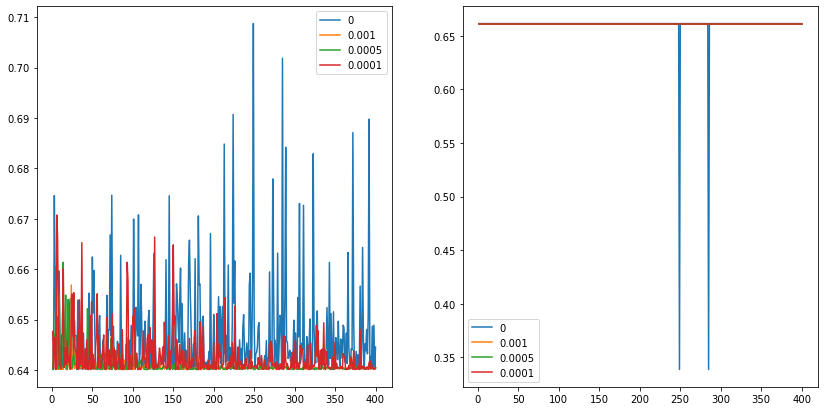

    decay       acc      loss
0  0.0000  0.661417  0.644546
1  0.0010  0.661417  0.640461
2  0.0005  0.661417  0.640280
3  0.0001  0.661417  0.640478


In [12]:
# first neural network with keras tutorial
from    keras.models import Sequential
from tensorflow.keras.initializers import RandomUniform
from    keras.layers import Dense
import  pandas as pd
from    sklearn.model_selection import train_test_split
import  matplotlib.pyplot  as plt
PATH  = "../datasets/"
import tensorflow as tf

# load the dataset
df = pd.read_csv(PATH + 'diabetes.csv', sep=',')

# split into input (X) and output (y) variables
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
        'DiabetesPedigreeFunction',    'Age']]
y = df[['Outcome']]

# Split into train and test data sets.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)

resultList = []
def buildModel(decayRate):
    # define the keras model
    model = Sequential()
    init = RandomUniform(minval=0, maxval=1)
    activation = 'tanh'
    model.add(Dense(230, input_dim=8, activation=activation,
                    kernel_initializer=init))

    NUM_LAYERS = 7
    for i in range(0, NUM_LAYERS-1):
        model.add(Dense(230, activation=activation,
                        kernel_initializer=init))

    model.add(Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.SGD(
        learning_rate=0.0005, momentum=0.9, name="SGD", decay=decayRate
    )

    # Compile the keras model.
    model.compile(loss='binary_crossentropy', optimizer=optimizer,
                  metrics=['accuracy'])

    # Fit the keras model on the dataset.
    history = model.fit(X, y, epochs=400, batch_size=10,
                        validation_data=(X_test, y_test))

    # Evaluate the model.
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    resultList.append({'loss':loss, 'acc':acc, 'decay':decayRate})
    print('Test Accuracy: %.3f' % acc)
    return history

def showLoss(history, rates):
    # Get training and test loss histories
    training_loss       = history.history['loss']
    validation_loss     = history.history['val_loss']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize loss history for training data.
    actualLabel = str(rates)
    plt.subplot(1, 2, 1)

    # View loss on unseen data.
    plt.plot(epoch_count, validation_loss, label=actualLabel)
    plt.legend()

def showAccuracy(history, rates):
    # Get training and test loss histories
    training_loss       = history.history['accuracy']
    validation_loss     = history.history['val_accuracy']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)
    plt.subplot(1, 2, 2)

    actualLabel = str(rates)
    # View loss on unseen data.
    plt.plot(epoch_count, validation_loss, label=actualLabel)
    plt.legend()

with tf.device('/cpu:0'):
    decayRates = [0, 0.001, 0.0005, 0.0001]
    plt.subplots(nrows=1, ncols=2,  figsize=(14,7))

    for i in range(0, len(decayRates)):
        history = buildModel(decayRates[i])
        showLoss(history, decayRates[i])
        showAccuracy(history, decayRates[i])

    plt.show()

    import pandas as pd
    df = pd.DataFrame(columns=['decay', 'acc', 'loss'])
    for result in resultList:
        df = df.append(result, ignore_index=True)
    print(df)

2022-02-01 21:42:00.202737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-01 21:42:00.323887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy improved from -inf to 0.62857, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.62857 to 0.64286, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.64286

Epoch 00004: val_accuracy did not improve from 0.64286

Epoch 00005: val_accuracy did not improve from 0.64286

Epoch 00006: val_accuracy improved from 0.64286 to 0.65714, saving model to best_model.h5

Epoch 00007: val_accuracy did not improve from 0.65714

Epoch 00008: val_accuracy improved from 0.65714 to 0.67143, saving model to best_model.h5

Epoch 00009: val_accuracy did not improve from 0.67143

Epoch 00010: val_accuracy did not improve from 0.67143

Epoch 00011: val_accuracy did not improve from 0.67143

Epoch 00012: val_accuracy did not improve from 0.67143

Epoch 00013: val_accuracy did not improve from 0.67143

Epoch 00014: val_accuracy did not improve from 0.67143

Epoch 00015: val_accuracy did not improve from 0.67143

Epoch 00016: val_accur

2022-02-01 21:42:09.275229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


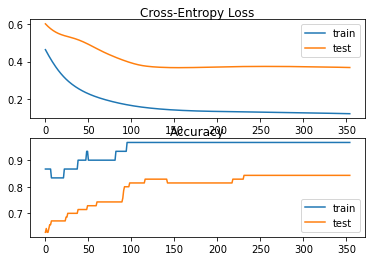

In [17]:
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Creating an overfit situation with the moons data set.
from sklearn.datasets       import make_moons
from keras.layers           import Dense
from keras.models           import Sequential
import matplotlib.pyplot    as plt

# Generate 2d classification dataset.
X, y    = make_moons(n_samples=100, noise=0.2, random_state=1)

# Split data into train and test.
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# Define the model.
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1,
                     save_best_only=True)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0,
                    callbacks=[es, mc])

# load the saved model
model = load_model('best_model.h5')

# Evaluate the model.
train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
test_loss, test_acc   = model.evaluate(testX, testy, verbose=0)
print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_acc, test_acc))
print('Train loss: %.3f, Test loss: %.3f' % (train_loss, test_loss))

# Plot loss learning curves.
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Plot accuracy learning curves.
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()